## SVM without data normalization

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('BreastCancer.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [2]:
print(df.isnull().sum())

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [3]:
df = df.drop(['Unnamed: 32','id'],axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [4]:
df = df.replace({'B':0,'M':1})
X = df.drop(('diagnosis'),axis = 1)
Y = df[['diagnosis']]

In [5]:
from sklearn.model_selection import train_test_split

# test set size of 20% of the data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

from sklearn import svm

 

model = svm.SVC(kernel = 'linear', random_state = 0, C=1.0)

model.fit(X_train, y_train.values.ravel())

prediction=model.predict(X_test)


In [6]:
from sklearn.metrics import accuracy_score
score =accuracy_score(prediction, y_test)
print(score*100,'%')

95.6140350877193 %


<AxesSubplot: >

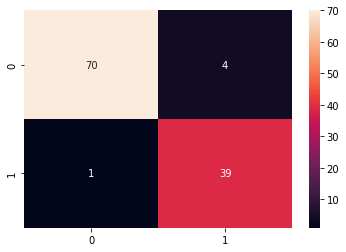

In [7]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cf_matrix = confusion_matrix(prediction, y_test)
sns.heatmap(cf_matrix, annot=True)

In [8]:
#classification report
from sklearn.metrics import classification_report
print('classification report')
print(classification_report(y_test,prediction))

classification report
              precision    recall  f1-score   support

           0       0.95      0.99      0.97        71
           1       0.97      0.91      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



## SVM but with normalizing features between (-1,1)

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC

df = pd.read_csv('BreastCancer.csv')
df = df.drop(['Unnamed: 32','id'],axis=1)
df = df.replace({'B':0,'M':1})
X = df.drop(('diagnosis'),axis = 1)
Y = df[['diagnosis']]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)

model = svm.SVC(kernel = 'linear', random_state = 0, C=1.0)

model.fit(X_train_scaled, y_train.values.ravel())

X_test_scaled = scaler.transform(X_test)
prediction = model.predict(X_test_scaled)

In [10]:
from sklearn.metrics import accuracy_score
score =accuracy_score(prediction, y_test)
print(score*100,'%')

96.49122807017544 %


In [11]:
from sklearn.metrics import classification_report

print('classification report')
print(classification_report(y_test,prediction))

classification report
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        67
           1       0.98      0.94      0.96        47

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



<AxesSubplot: >

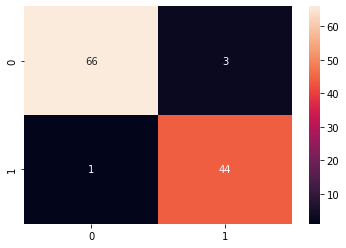

In [12]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cf_matrix = confusion_matrix(prediction, y_test)
sns.heatmap(cf_matrix, annot=True)

###  **Conclusion**
normalizing data results in better accuracy